# <span style="color:red">Medical Student Mental Health</span> 

Demographic information, self-reported data and results from psychological tests on medical students in Switzerland.  

**Link:** https://www.kaggle.com/datasets/thedevastator/medical-student-mental-health

**Context:** Comprehensive picture of the mental states of students in the medical field.

**Content:**
* "id" - Participants ID number	(string)
* "age" - Age at questionnaire 20-21 (numeric)
* "year" - CURICULUM YEAR: In which curriculum year are you? (1=Bmed1; 2=Bmed2; 3=Bmed3; 4=Mmed1; 5=Mmed2; 6=Mmed3)
* "sex"	- GENDER: To which gender do you identify the most?	(1=Man; 2=Woman; 3=Non-binary)
* "glang" - MOTHER TONGUE: What is your mother tongue? (1=French; 15=German; 20=English; 37=Arab; 51=Basque; 52=Bulgarian; 53=Catalan; 54=Chinese; 59=Korean; 60=Croatian; 62=Danish; 63=Spanish; 82=Estonian; 83=Finnish; 84=Galician; 85=Greek; 86=Hebrew; 87=Hindi; 88=Hungarian; 89=Indonesian; 90=Italian; 92=Japanese; 93=Kazakh; 94=Latvian; 95=Lithuanian; 96=Malay; 98=Dutch; 100=Norwegian; 101=Polish; 102=Portuguese; 104=Romanian; 106=Russian; 108=Serbian; 112=Slovak; 113=Slovenian; 114=Swedish; 116=Czech; 117=Thai; 118=Turkish; 119=Ukrainian; 120=Vietnamese; 121=Other)
* "part" - PARTNERSHIP STATUS: Do you have a partner? (0=No; 1=Yes)
* "job" - HAVING A JOB: Do you have a paid job? (0=No; 1=Yes)
* "stud_h" - HOURS OF STUDY PER WEEK: On average how many hours per week do you study on top of courses? (numeric)
* "health" - SATISFACTION WITH HEALTH: How satisfied are you with your health? (1=Verydissatisfied; 2=Dissatisfied; 3=Neithersatisfiednordissatisfied; 4=Satisfied; 5=Verysatisfied)
* "psyt" - PSYCHOTHERAPY LAST YEAR: During the last 12 months have you ever consulted a psychotherapist or a psychiatrist for your health? (0=No, 1=Yes)
* "jspe" - JSPE total empathy score	(numeric)
* "qcae_cog" - QCAE Cognitive empathy score	(numeric)
* "qcae_aff" - QCAE Affective empathy score	(numeric)
* "amsp" - AMSP total score	(numeric)
* "erec_mean" - GERT: mean value of correct responses (numeric)
* "cesd" - CES-D total score (numeric)
* "stai_t" - STAI score	(numeric)
* "mbi_ex" - MBI Emotional Exhaustion (numeric)
* "mbi_cy" - MBI Cynicism (numeric)
* "mbi_ea" - MBI Academic Efficacy (numeric)

In [1]:
import numpy as np
import pandas as pd
import pickle # to save trained models

In [2]:
data = pd.read_csv("mentalhealth.csv")
print(data.head(5))

   id  age  year  sex  glang  part  job  stud_h  health  psyt  jspe  qcae_cog  \
0   2   18     1    1    120     1    0      56       3     0    88        62   
1   4   26     4    1      1     1    0      20       4     0   109        55   
2   9   21     3    2      1     0    0      36       3     0   106        64   
3  10   21     2    2      1     0    1      51       5     0   101        52   
4  13   21     3    1      1     1    0      22       4     0   102        58   

   qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_ex  mbi_cy  mbi_ea  
0        27    17   0.738095    34      61      17      13      20  
1        37    22   0.690476     7      33      14      11      26  
2        39    17   0.690476    25      73      24       7      23  
3        33    18   0.833333    17      48      16      10      21  
4        28    21   0.690476    14      46      22      14      23  


In [3]:
# Print information on the dataset
print("Dimension of the dataset: ",np.shape(data),"\n")
print("Summary of the data to see their distribution:\n",data.describe(),"\n")
print("Data type of each column in the tabular data loaded as pandas DataFrame:\n",data.dtypes,"\n")
print("Missing values in dataset:\n",data.isnull().sum())

Dimension of the dataset:  (886, 20) 

Summary of the data to see their distribution:
                 id         age        year         sex       glang  \
count   886.000000  886.000000  886.000000  886.000000  886.000000   
mean    889.709932   22.383747    3.102709    1.695260   14.327314   
std     515.555875    3.300664    1.763937    0.472665   32.366389   
min       2.000000   17.000000    1.000000    1.000000    1.000000   
25%     447.500000   20.000000    1.000000    1.000000    1.000000   
50%     876.000000   22.000000    3.000000    2.000000    1.000000   
75%    1341.750000   24.000000    5.000000    2.000000    1.000000   
max    1790.000000   49.000000    6.000000    3.000000  121.000000   

             part         job      stud_h      health        psyt        jspe  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean     0.563205    0.348758   25.288939    3.777652    0.224605  106.374718   
std      0.496269    0.476847   15.9278

In [4]:
data = data.drop(["id"],axis=1) # this variable is not useful for the prediction
np.shape(data)

(886, 19)

In [5]:
X = data.drop(["mbi_ex","mbi_cy","mbi_ea"],axis=1) # the variable indicating the mental health
y = data["mbi_ex"] # try to predict emotional exhaustion
print("Features: ",X[:5],"\nLabels: ",y[:5],sep="\n")

Features: 
   age  year  sex  glang  part  job  stud_h  health  psyt  jspe  qcae_cog  \
0   18     1    1    120     1    0      56       3     0    88        62   
1   26     4    1      1     1    0      20       4     0   109        55   
2   21     3    2      1     0    0      36       3     0   106        64   
3   21     2    2      1     0    1      51       5     0   101        52   
4   21     3    1      1     1    0      22       4     0   102        58   

   qcae_aff  amsp  erec_mean  cesd  stai_t  
0        27    17   0.738095    34      61  
1        37    22   0.690476     7      33  
2        39    17   0.690476    25      73  
3        33    18   0.833333    17      48  
4        28    21   0.690476    14      46  

Labels: 
0    17
1    14
2    24
3    16
4    22
Name: mbi_ex, dtype: int64


# <span style="color:red">Data visualization and refinement</span> 

The dataset contains 886 rows and 19 columns, where the rows correspond to the samples of the dataset and the columns correspond to their representative information. mbi_ex or emotional exhaustion: This measures depressive symptoms and could be a primary target for understanding mental health, and other columns represent the predictors.

In [6]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns # high-level visualization based on matplotlib

In this part we use boxplot to visualize data .A boxplot, visually summarizes a dataset's distribution, showing the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. It highlights the central 50% of the data and potential outliers. Boxplots are used for comparing distributions, identifying outliers, and providing a quick visual summary of data variability and central tendency. They are essential in exploratory data analysis and quality control.

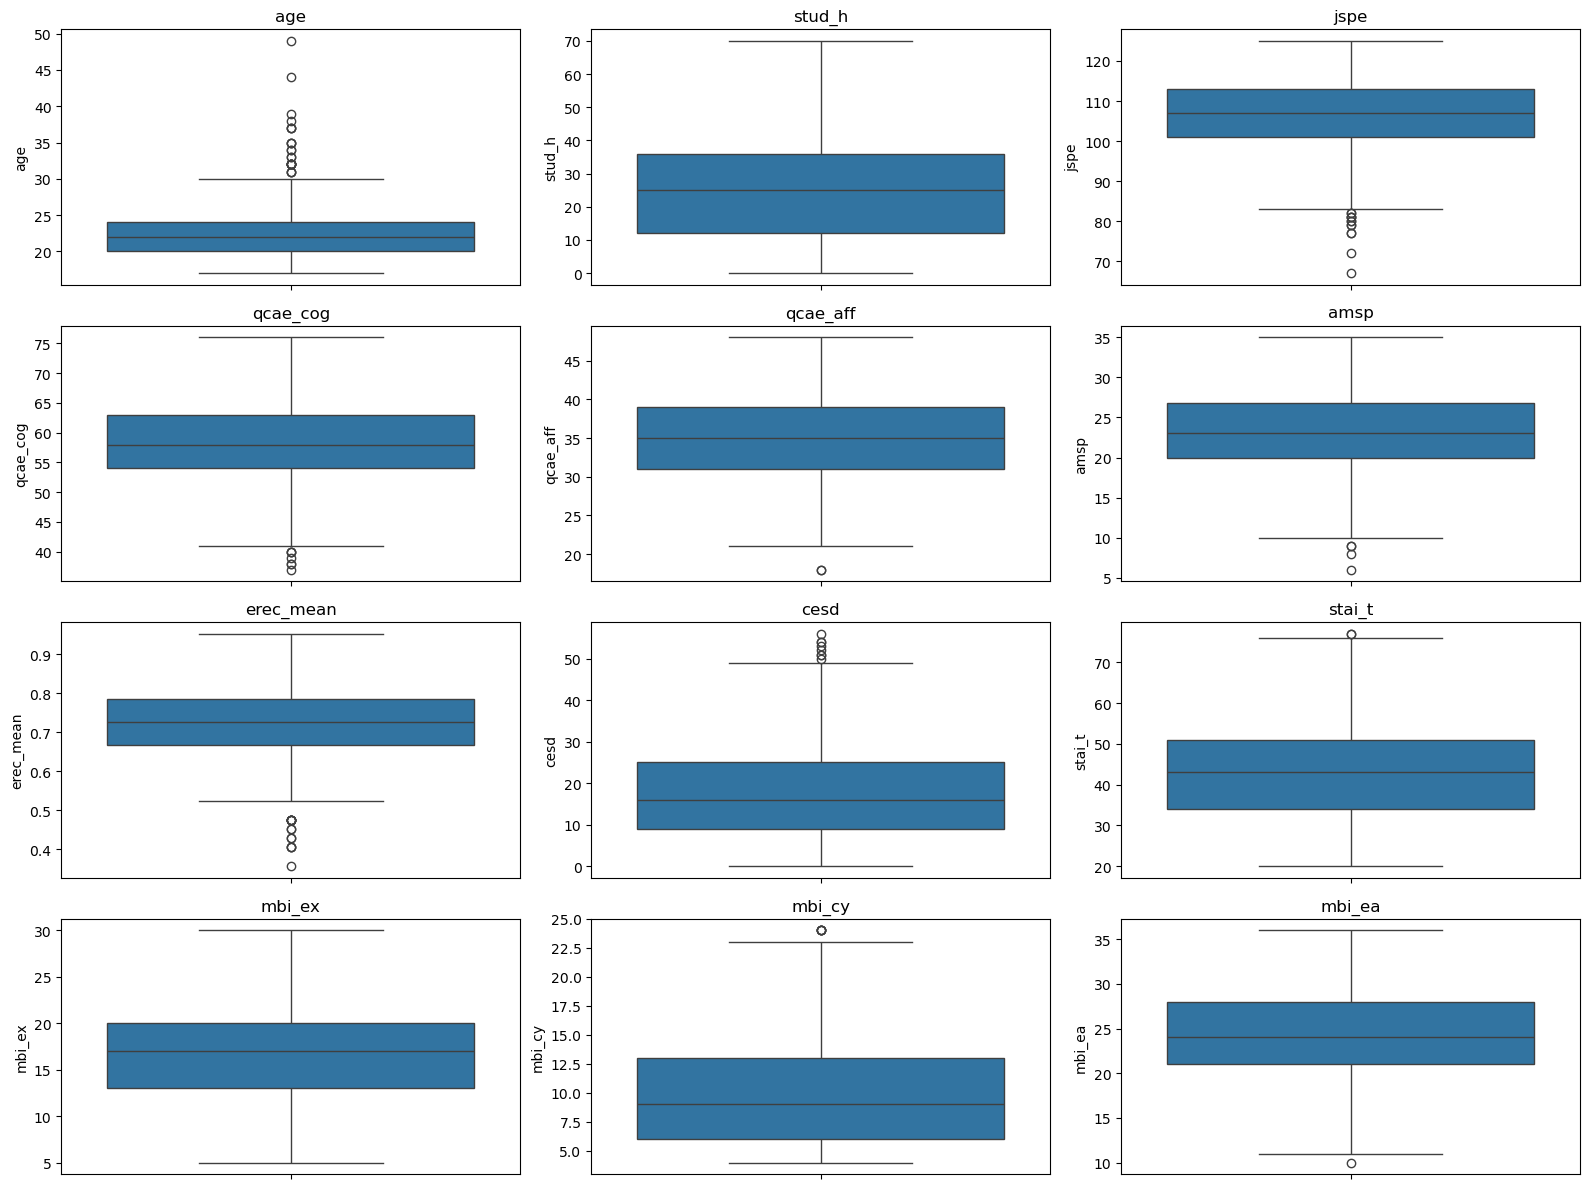

In [7]:
# List of numeric columns for which boxplots will be generated
numeric_columns = ["age", "stud_h", "jspe", "qcae_cog", "qcae_aff", "amsp", "erec_mean", "cesd", "stai_t", "mbi_ex", "mbi_cy", "mbi_ea"]
# Boxplot to visualize outliers
plt.figure(figsize=(16, 12))

# Generate boxplots for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=data[column])
    plt.title(column)

# Adjust layout
plt.tight_layout()
plt.show()

**By analyzing the boxplots, we can see that "age", "jspe", "erec_mean", and "cesd" have some potential outliers within this dataset**

## <span style="color:red">Calculate and remove outliers</span>

In this part we use IQR method to detect and remove outliers. The interquartile range (IQR) measures the spread of the middle 50% of a dataset. It is calculated as the difference between the third quartile (Q3, the 75th percentile) and the first quartile (Q1, the 25th percentile), defined as 
IQR
=
𝑄
3
−
𝑄
1
IQR=Q3−Q1. The IQR is used to identify outliers and assess data variability.

**As the boxplot, the result of this part indicate that "age", "jspe", "erec_mean", "cesd" have potential outliers which we remove them**

In [8]:
# Calculate outliers percentage in every column
for column in numeric_columns:
    content = data[column]
    q1 = content.quantile(0.25)
    q3 = content.quantile(0.75)
    irq = q3 - q1 # interquartile range
    content_col = content[(content <= q1 - 1.5 * irq) | (content >= q3 + 1.5 * irq)] # whiskers represent the expected data variation and they extend 1.5 * irq from box upper and lower bounds
    perc = np.shape(content_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (column, perc))

Column age outliers = 2.93%
Column stud_h outliers = 0.00%
Column jspe outliers = 1.69%
Column qcae_cog outliers = 0.79%
Column qcae_aff outliers = 0.23%
Column amsp outliers = 0.45%
Column erec_mean outliers = 1.69%
Column cesd outliers = 1.02%
Column stai_t outliers = 0.23%
Column mbi_ex outliers = 0.00%
Column mbi_cy outliers = 0.56%
Column mbi_ea outliers = 0.11%


In [9]:
# Columns with high outlier percentages
high_outlier_columns = ["age", "jspe", "erec_mean", "cesd"]

# Remove outliers from each high outlier column
for column in high_outlier_columns:
    content = data[column]
    Q1 = content.quantile(0.25)
    Q3 = content.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(content >= lower_bound) & (content <= upper_bound)]

## <span style="color:red">Visualize data using Histogram</span>

In this part, histogram is used to visualize the dat. A histogram is a graphical representation of the distribution of a dataset. It consists of adjacent bars, where each bar represents the frequency (count) of data points within a specific range or bin. Histograms are useful for visualizing the shape, central tendency, and spread of data, as well as identifying patterns, such as skewness or the presence of outliers.

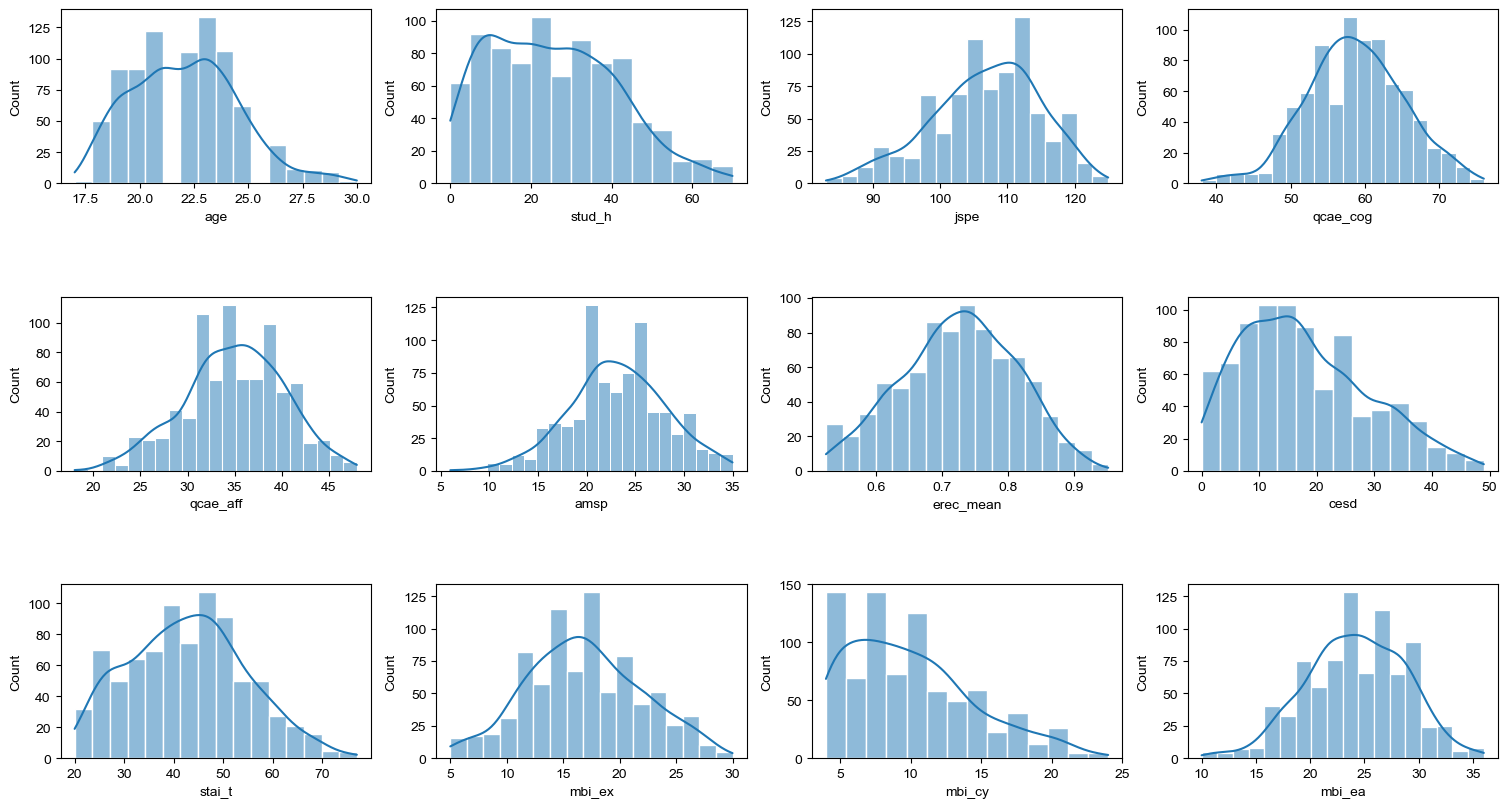

In [10]:
fig,axs = plt.subplots(ncols=4,nrows=3,figsize=(15, 8))
sns.set_style("white")
index = 0
axs = axs.flatten()
for column in numeric_columns:
    content = data[column]
    sns.histplot(content,kde=True,ax=axs[index]) # distribution plots
    index += 1
plt.tight_layout(pad=0.4,w_pad=0.5,h_pad=5.0)

## <span style="color:red">Visualize data using Correlation matrix</span> 

In this part correlation matrix is used to represent the relation between the variables of dataset. A correlation matrix is a table showing correlation coefficients between variables. Each cell in the matrix represents the correlation between two variables, ranging from -1 to 1. Values close to 1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values around 0 indicate little or no linear correlation. This matrix helps identify relationships and dependencies among multiple variables in a dataset.

**We can see that, mbi_ex has higher correlation with cesd and stai_t compared with other features.**

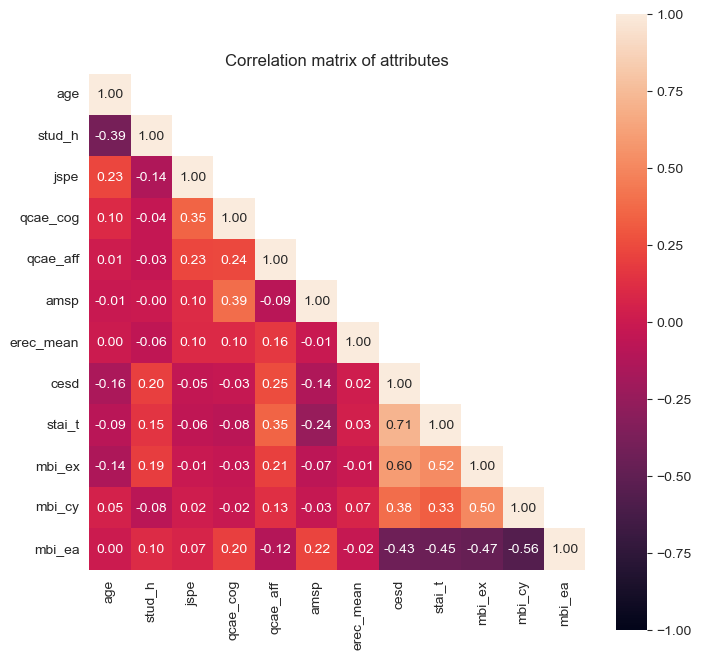

In [11]:
# Compute the correlation matrix
correMtr = data[numeric_columns].corr()
mask = np.array(correMtr)
mask[np.tril_indices_from(mask)] = False # the correlation matrix is symmetric
# Heat map for correlation matrix
fig,ax = plt.subplots(figsize=(8,8))
sns.set_style("white")
sns.heatmap(correMtr,mask=mask,vmin=-1.0,vmax=1.0,square=True,annot=True,fmt="0.2f",ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

## <span style="color:red">Visualize data using Probability plot</span>  

In this part, a probability plot is used to represent the distribution of mbi_ex field. A probability plot is a graphical technique used to assess if a dataset follows a specified distribution, such as the normal distribution. It plots the observed data points against the expected quantiles of the chosen distribution. If the points approximately form a straight line, it indicates that the data likely follows the specified distribution. Probability plots are useful for checking normality and other distributional assumptions in statistical analysis.

**As can bee seen in the plot, the field to predict (mbi_ex), has distribution near to normal distribution.**

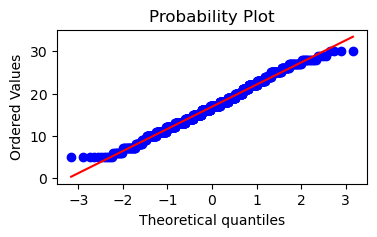

In [8]:
import scipy
from scipy import stats
# Normal plot
fig = plt.figure(figsize=(4,2))
stats.probplot(data.mbi_ex.tolist(),dist='norm',plot=plt)
plt.show()

# <span style="color:red">Linear regression</span> 

We use linear regression as a baseline method to predict target value(mbi_ex). After that, we will try more complicated methods to compare with this approach.

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Initialize variables
kf = KFold(n_splits=6, shuffle=True, random_state=42)
scaler = StandardScaler()
lin_reg = LinearRegression()
validation = []

# Perform cross-validation
for train_idx, val_idx in kf.split(X, y):
    # Define training and validation sets
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
    # Standardize features
    X_train_std = scaler.fit_transform(X_train)
    X_val_std = scaler.transform(X_val)  # Correctly use transform on validation data
    
    # Fit model and predict
    lin_reg.fit(X_train_std, y_train)
    y_pred = lin_reg.predict(X_val_std)
        
    # Store results
    tmp = {"y_val": y_val, "y_pred": y_pred}
    tmp_df = pd.DataFrame(tmp)
    validation.append(tmp_df)   

# Calculate R-squared for each fold
all_r2 = np.zeros(kf.get_n_splits())
for i, fold in enumerate(validation):
    y_val = fold['y_val'].to_numpy()
    y_pred = fold['y_pred'].to_numpy()
    all_r2[i] = metrics.r2_score(y_val, y_pred)

# Calculate the adjusted R-squared
n = len(y)  # number of observations
p = X.shape[1]  # number of features
adjusted_r2 = 1 - (1 - np.mean(all_r2)) * (n - 1) / (n - p - 1)

# Calculate RMSE for each fold
all_rmse = np.zeros(kf.get_n_splits())
for i, fold in enumerate(validation):
    y_val = fold['y_val'].to_numpy()
    y_pred = fold['y_pred'].to_numpy()
    mse = metrics.mean_squared_error(y_val, y_pred)
    all_rmse[i] = np.sqrt(mse)

# Calculate the cross-validated RMSE
cross_validated_rmse = np.mean(all_rmse)

# Print results
print("R-squared of each fold:", all_r2)
print("Average R-squared:", np.mean(all_r2))
print("Standard Deviation of R-squared:", np.std(all_r2))
print("The cross-validated R-squared is:", np.mean(all_r2))
print("The adjusted R-squared is:", adjusted_r2)
print("RMSE of each fold:", all_rmse)
print("The cross-validated RMSE is:", cross_validated_rmse)

R-squared of each fold: [0.39328696 0.31941347 0.52114217 0.23979487 0.48961389 0.32764705]
Average R-squared: 0.38181640263084704
Standard Deviation of R-squared: 0.09845650769243149
The cross-validated R-squared is: 0.38181640263084704
The adjusted R-squared is: 0.370434426154545
RMSE of each fold: [4.18333372 4.52401244 3.59258482 4.32211289 3.64211261 4.31173171]
The cross-validated RMSE is: 4.095981364435252


The small standard deviation suggests that the model performs consistently across different folds. While, An average R-squared of around 0.375 indicates that while the model is capturing some of the variability in "mbi_ex", there is still a significant portion of the variance that remains unexplained. This suggests that there may be other factors influencing "mbi_ex" that are not included in the model or that the model might need further tuning.Cross-validated R-squared is 0.378 which reflects the model's generalizability to new data, consistent with the average R-squared. Adjusted R-squared is 0.316 indicating the model explains about 31.6% of the variance when accounting for predictor count.

## <span style="color:red">Visualizing real versus predicted "mbi_ex"</span>

Visualizing real versus predicted values is crucial for understanding how well your model performs and identifying any areas where it may need improvement. Scatter plots with regression lines help in assessing the accuracy and reliability of the predictions across different validation folds or datasets.

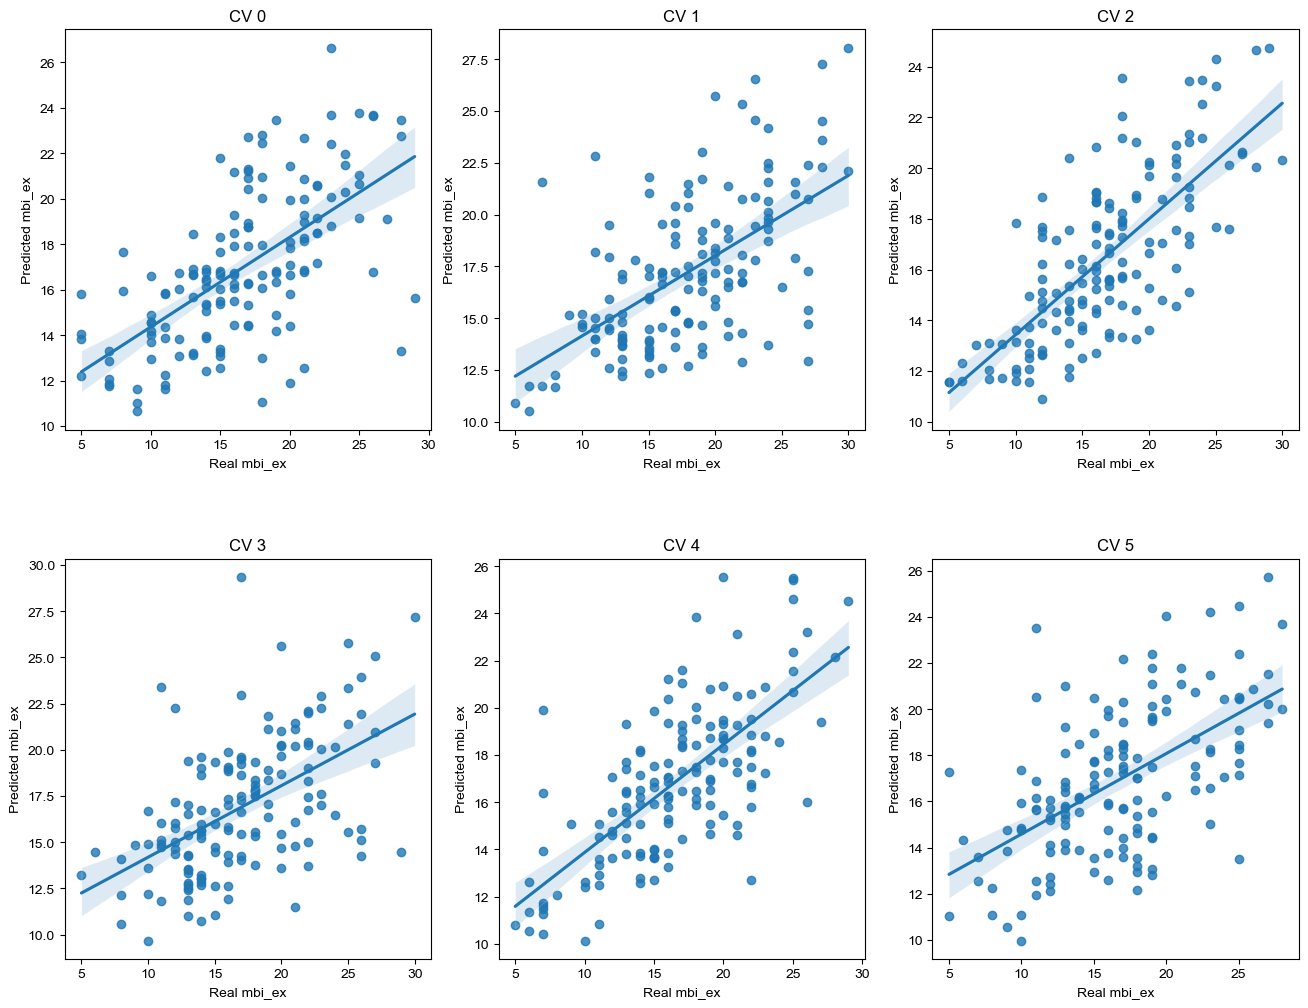

In [11]:
# Visualizing real versus predicted "mbi_ex"
fig, axs = plt.subplots(ncols=3,nrows=2,figsize=(13,10))
sns.set_style("white")
axs = axs.flatten()
index = 0
for i in np.arange(6):
    pred = validation[i]
    pred = pred.to_numpy()        
    sns.regplot(y=pred[:,1], x=pred[:,0], ax=axs[index])
    title = "CV "+str(i)
    axs[index].set_title(title)
    axs[index].set_xlabel("Real mbi_ex")
    axs[index].set_ylabel("Predicted mbi_ex")
    index = index + 1 
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# <span style="color:red">Visual interpretation using confidence interval</span>

Visualizing confidence intervals helps in understanding the precision and reliability of model predictions or statistical estimates. Confidence intervals provide insight into the range where true values are expected to lie, aiding in the interpretation of model performance and prediction uncertainty.

In [12]:
import statsmodels.api as sm

X_train_intercept = np.c_[np.ones((X_train_std.shape[0],1)),X_train_std]
# Fit the model
model = sm.OLS(y_train, X_train_intercept)
results = model.fit()

results.summary()

# Get the standard errors of the coefficients
standard_errors = results.bse
beta_coefficients = results.params

# Getting the 95% confidence interval of the weights given their standard errors
confidence_intervals = results.conf_int(alpha=0.05)  # alpha=0.05 corresponds to a 95% confidence level
print("The 95% confidence intervals are: ", confidence_intervals)

The 95% confidence intervals are:                 0          1
const  16.616948  17.196314
x1     -0.901945  -0.163204
x2     -0.591397   0.245413
x3     -0.387191   0.262086
x4     -0.532259   0.066693
x5      0.079174   0.676182
x6     -0.300955   0.303995
x7     -0.107267   0.591993
x8     -0.572018   0.060371
x9     -0.271349   0.347753
x10    -0.157676   0.502981
x11    -0.544974   0.143258
x12    -0.048460   0.638669
x13    -0.208511   0.461467
x14    -0.443643   0.158688
x15     1.957374   2.824756
x16     0.451156   1.344163


C:\Users\39320\AppData\Local\Temp\ipykernel_14100\760721778.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(beta_coefficients[i], i, 'bo')  # Plot the coefficient
C:\Users\39320\AppData\Local\Temp\ipykernel_14100\760721778.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.hlines(i, confidence_intervals[0][i], confidence_intervals[1][i], colors='red', linewidth=2)  # Plot the CI


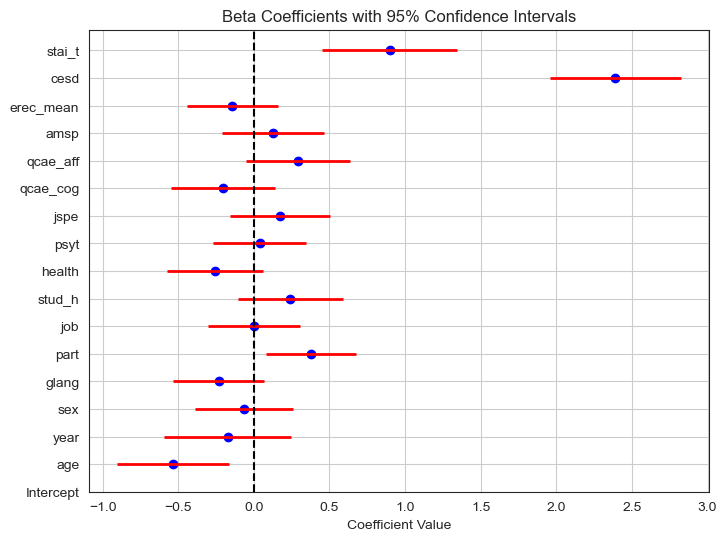

In [13]:
import matplotlib.pyplot as plt

# Plot the coefficients with confidence intervals
fig, ax = plt.subplots(figsize=(8, 6))

# Number of coefficients
num_coeffs = len(beta_coefficients)
# Plot each coefficient with its confidence interval
for i in range(1,num_coeffs):
    plt.plot(beta_coefficients[i], i, 'bo')  # Plot the coefficient
    plt.hlines(i, confidence_intervals[0][i], confidence_intervals[1][i], colors='red', linewidth=2)  # Plot the CI

# Add labels and title
# Visualizing zero
ax.axvline(x=0,color='k',linestyle='--')
ax.set_yticks(np.arange(num_coeffs))
ax.set_yticklabels(['Intercept'] + list(X.columns))
ax.set_xlabel('Coefficient Value')
ax.set_title('Beta Coefficients with 95% Confidence Intervals')
plt.grid(True)

These intervals provide insight into which features significantly affect the dependent variable, helping to understand the impact and importance of each predictor in the model. We can summarize the results as below:

**Significant Positive Effects:**  part, cesd, stai_t

**Significant Negative Effect:** age

**Non-Significant Effects:** year, sex, glang, job, stud_h, health, psyt, jspe, qcae_cog, qcae_aff, amsp, erec_mean

# <span style="color:red">Feature selection using backward stepwise linear regression</span> 

In this part, backward stepwise method is used to choose important features. Backward stepwise linear regression is a feature selection method used to improve model performance by iteratively removing the least significant features. This technique helps in identifying which features contribute most to the predictive power of the model and eliminating those that do not.

**Using the below function, we remove features based on their p_value. We can see that, at the end of this process, we reach to the below set as the most important features, which is compatible with the result of "confidence interval" analysis**

**Selected features: ['age', 'part', 'cesd', 'stai_t']**

In [14]:
def backward_elimination(X_train, y_train, significance_level=0.05):
    features = X_train.columns.tolist()
    print('Initial feature set: ',features)
    counter = 0
    while features:
        model = sm.OLS(y_train, sm.add_constant(X_train[features])).fit()
        p_values = model.pvalues[1:]  # Exclude the constant term
        max_p_value = p_values.max()
        if max_p_value >= significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
        print("===========Step: "+str(counter)+"===================")
        print(f"Selected features: {features}")
        print(f"Removed features: {excluded_feature}")
        counter +=1
        
    return features, excluded_feature

In [15]:
# Perform backward elimination
selected_features,removed_features = backward_elimination(X_train, y_train)
# Fit the final model with the selected features
model = sm.OLS(y_train, sm.add_constant(X_train[selected_features])).fit()
print(model.summary())

Initial feature set:  ['age', 'year', 'sex', 'glang', 'part', 'job', 'stud_h', 'health', 'psyt', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t']
===========Step: 0===================
Selected features: ['age', 'year', 'sex', 'glang', 'part', 'stud_h', 'health', 'psyt', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t']
Removed features: job
===========Step: 1===================
Selected features: ['age', 'year', 'sex', 'glang', 'part', 'stud_h', 'health', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t']
Removed features: psyt
===========Step: 2===================
Selected features: ['age', 'year', 'glang', 'part', 'stud_h', 'health', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t']
Removed features: sex
===========Step: 3===================
Selected features: ['age', 'glang', 'part', 'stud_h', 'health', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t']
Removed features: year
====

# <span style="color:red">Feature selection using bootstrap method</span> 

The bootstrap method for feature selection is a robust technique that helps in identifying important features by evaluating their importance across multiple resampled datasets. This method improves feature selection reliability by reducing variance and capturing the stability of feature contributions.

**We can see that, using both methods "Confidence interval" ,"Backward stepwise linear regression" and "Bootstrap feature selection", we reach to same feature set contains features below:**
**Selected top features: ['cesd', 'stai_t', 'age', 'part']**

In [16]:
def forward_selection(X, y, significance_level=0.05):
    initial_features = X.columns.tolist()
    best_features = []
    while initial_features:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [17]:
from sklearn.utils import resample
from collections import Counter
bootnum = 100 # number of bootstrap repetitions
selected_features_list = []
# Concatenating y and X to subsequently resample both in the same way
YX = np.zeros([X_train_std.shape[0],X_train_std.shape[1]+1]) 
YX[:,0] = y_train
YX[:,1:] = X_train_std
# Starting bootstrap
for i in np.arange(bootnum):
    resampled = resample(YX) # resampling samples with replacement
    y_res = resampled[:,0]
    X_res = resampled[:,1:]
    X_res = pd.DataFrame(X_res, columns=X_train.columns.tolist())
     # Feature selection
    selected_features = forward_selection(X_res, y_res)
    selected_features_list.extend(selected_features)
    # Aggregate the results
feature_counts = Counter(selected_features_list)

# Determine the most frequently selected features
most_common_features = feature_counts.most_common()

print("Most common features from bootstrap samples:")
for feature, count in most_common_features:
    print(f"{feature}: {count} times")

# Select the top N features (you can choose a threshold or a specific number of features)
top_features = [feature for feature, count in most_common_features if count > (bootnum / 2)]

print(f"Selected top features: {top_features}")


# Fit the final model with the selected features
X_train_with_const = sm.add_constant(X_train[top_features])
model = sm.OLS(y_train, X_train_with_const).fit()

# Print the model summary
print(model.summary())

Most common features from bootstrap samples:
cesd: 100 times
stai_t: 99 times
age: 85 times
part: 67 times
health: 39 times
glang: 36 times
stud_h: 31 times
qcae_aff: 30 times
year: 26 times
jspe: 17 times
erec_mean: 15 times
qcae_cog: 10 times
amsp: 7 times
job: 6 times
psyt: 3 times
sex: 3 times
Selected top features: ['cesd', 'stai_t', 'age', 'part']
                            OLS Regression Results                            
Dep. Variable:                 mbi_ex   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     131.9
Date:                Sun, 14 Jul 2024   Prob (F-statistic):           7.15e-85
Time:                        11:31:01   Log-Likelihood:                -2074.1
No. Observations:                 739   AIC:                             4158.
Df Residuals:                     734   BIC:                             4181.
Df Model:   

# <span style="color:red">Random Forest regressor modeling</span>

Random Forest Regressor is a powerful ensemble learning method used for regression tasks. It builds multiple decision trees during training and outputs the mean prediction of the individual trees to make the final prediction. This technique improves prediction accuracy and controls overfitting.

In [ ]:
# This code is commented out because it takes too long to execute.
# import numpy as np
# import pandas as pd
# import pickle
# from sklearn.model_selection import GridSearchCV, KFold
# from sklearn.ensemble import RandomForestRegressor

# ## Defining hyperparameters' range for tuning through GridSearchCV
# param_grid = {"n_estimators":[100,500,1000], # number of trees in the forest
#               "max_depth":[5,6,7,8,9,10], # maximum depth of the tree
#               "min_samples_split":[5,10,25,50], # minimum number of samples required to split an internal node
#               "min_samples_leaf":[5,10,25,50], # minimum number of samples required to be at a leaf node
#               "max_features":[3,8,13]} # number of features to consider (3 is log2(#features) and 13 is the whole number of features)
# #
# ## Defining the GridSearchCV object that will consider the best estimator based on MSE (the random forest criterion used)
# grid = GridSearchCV(RandomForestRegressor(random_state=42),param_grid,cv=KFold(n_splits=5),verbose=4)
# #
# ## Storing indices to recover the splits
# train_idx = []
# val_idx = []
# for train,val in grid.cv.split(X,y):
#     train_idx.append(train)
#     val_idx.append(val)
# #
# ## Fitting the model for hyperparameters grid search
# grid.fit(X,y)
# #
# ## Storing results
# #
# file = open("RF_tuned.model", "wb") # open a file in writing mood
# pickle.dump(grid.best_estimator_, file) # dump information to that file
# file.close() # close the file 
# #
# file = open("train_idx_rf.split", "wb") # open a file in writing mood
# pickle.dump(train_idx, file) # dump information to that file
# file.close() # close the file 
# #
# file = open("val_idx_rf.split", "wb") # open a file in writing mood
# pickle.dump(val_idx, file) # dump information to that file
# file.close() # close the file 
# #
# pd.DataFrame(grid.cv_results_).to_csv("RF_gs_results.csv") # save the grid search in a csv

In [18]:
# Loading the stored best estimator found after hyperparameters tuning performed through GridSearchCV
file = open("RF_tuned.model", "rb") # open the file in reading mood
rf_tuned = pickle.load(file) # load information from the file
file.close() # close the file

## <span style="color:red">Calculating RMSE from MSE stored in the results of cross-validated grid searcch</span> 

As can be seen in the below results, the Random Forest Regressor shows better predictive performance with a lower RMSE compared to the Linear Regression model, indicating it can better handle the data’s complexity.

In [19]:
rf_gs = pd.read_csv("RF_gs_results.csv")
# Extracting performance results for the best estimator obtained
params = rf_tuned.get_params()
n_estimators = params.get("n_estimators")
max_depth = params.get("max_depth")
min_samples_split = params.get("min_samples_split")
min_samples_leaf = params.get("min_samples_leaf")
max_features = params.get("max_features")
# Matching 
results = rf_gs[(rf_gs["param_n_estimators"]==n_estimators) & (rf_gs["param_max_depth"]==max_depth) & (rf_gs["param_min_samples_split"]==min_samples_split) & (rf_gs["param_min_samples_leaf"]==min_samples_leaf) & (rf_gs["param_max_features"]==max_features)]
results = results[["split0_test_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score"]]

In [20]:
rf_gs = pd.read_csv("RF_gs_results.csv")

In [21]:
# Calculating RMSE from MSE stored in the results of cross-validated grid searcch
print("RMSE of every fold:\n",results**0.5,"\n")
print("The cross-validated RMSE is: ",np.median(results**0.5))

RMSE of every fold:
      split0_test_score  split1_test_score  split2_test_score  \
200           0.644498           0.618909           0.620834   

     split3_test_score  split4_test_score  
200           0.703851           0.541519   

The cross-validated RMSE is:  0.6208335052412011


## <span style="color:red">Random Forest built-in features importance</span> 

Random Forest provides built-in functionality to evaluate feature importance, which helps in understanding which features contribute most to the predictions made by the model. 

**Just like backward step linear regression and bootstrap approach, the first two important features for training the random forest model on the dataset are cest and stai_t.**

In [25]:
# Loading training set indices to recover the splits used during fitting
file = open("train_idx_rf.split", "rb") # open the file in reading mood
train_idx = pickle.load(file) # load information from the file
file.close() # close the file

# Loading validation set indices to recover the splits used during fitting
file = open("val_idx_rf.split", "rb") # open the file in reading mood
val_idx = pickle.load(file) # load information from the file
file.close() # close the file

# Recovering the split corresponding to the best fold based on validation RMSE
X_train = X.iloc[train_idx[2]]
y_train = y.iloc[train_idx[2]]
X_val = X.iloc[val_idx[2]]
y_val = y.iloc[val_idx[2]]

# Fitting the estimator on the training set
best_rf = rf_tuned.fit(X_train,y_train)
# Getting the features importance from the built-in method of the Random Forest regressor in scikit
print("Importance of the features used to train the Random Forest regressor are:\n",best_rf.feature_importances_)

Importance of the features used to train the Random Forest regressor are:
 [0.02679614 0.04718883 0.00168775 0.0031875  0.00510222 0.00184852
 0.02926151 0.0506843  0.00495027 0.01922044 0.01905071 0.03272748
 0.02637016 0.01210147 0.49555413 0.22426857]


Text(0.5, 0, 'Random Forest Feature Importance')

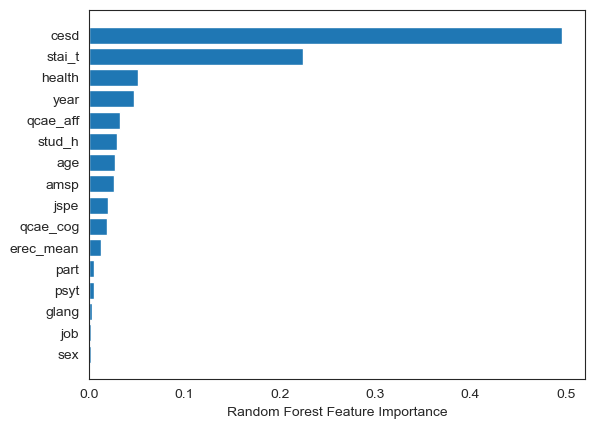

In [26]:
# Visualizing features sorted by importance 
sorted_idx = best_rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], best_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## <span style="color:red">Permutation features importance</span> 

Permutation feature importance is a model-agnostic technique used to assess the importance of features by measuring how shuffling a feature's values impacts the model's performance. 

**We can see that the four important feature in both previous methods are the same, with a change in order of third and forth features.**

Text(0.5, 0, 'Permutation Importance')

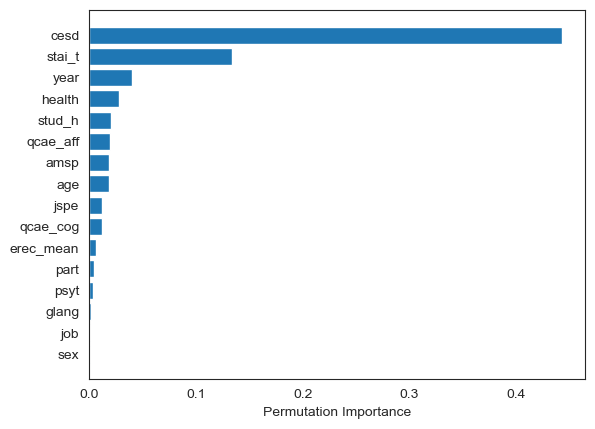

In [42]:
# Obtaining features importance by permutation
from sklearn.inspection import permutation_importance
perm_importance_train = permutation_importance(best_rf,X_train,y_train)
sorted_idx = perm_importance_train.importances_mean.argsort()
plt.barh(X.columns[sorted_idx],perm_importance_train.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

## <span style="color:red">LIME features importance</span>

LIME (Local Interpretable Model-agnostic Explanations) is a technique designed to explain the predictions of any machine learning model by approximating it with a simpler, interpretable model locally around each prediction. This can be particularly useful for understanding complex models, such as Random Forests or neural networks, which might be difficult to interpret directly.

**We can similar two first important features in this method and previous feature importance approaches.**

In [43]:
# Specific LIME implementation for tabular data
from lime.lime_tabular import LimeTabularExplainer 

lime_explainer = LimeTabularExplainer(training_data=X_train.values,mode="regression",feature_names=list(X_train.columns[:]),verbose=True)

# Choose an instance to explain
instance = X_train.iloc[0]


# Explain the prediction for the chosen instance
exp = lime_explainer.explain_instance(instance.values, best_rf.predict, num_features=instance.shape[0])

# Show the explanation
exp.show_in_notebook(show_table=True, show_all=False)

C:\Users\39320\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 15.696534573521289
Prediction_local [21.37270158]
Right: 21.56936968904091


In [44]:
# Extract feature importance from the explanation
feature_importance = exp.as_list()
print("Feature Importance:", feature_importance)

Feature Importance: [('cesd > 25.00', 3.844095459040058), ('stai_t > 51.00', 1.4175199857632395), ('health <= 3.00', 0.41278059427530733), ('qcae_aff <= 31.00', -0.2832932304148105), ('stud_h > 35.00', 0.24366850601510212), ('year <= 1.00', 0.23760058223836517), ('0.00 < part <= 1.00', 0.20365866705466987), ('amsp <= 20.00', -0.18101127838395117), ('59.00 < qcae_cog <= 63.00', -0.14781455703428628), ('age <= 20.00', 0.13261726121180054), ('jspe <= 102.00', -0.1258956546220709), ('psyt <= 0.00', -0.08939623279120262), ('job <= 0.00', 0.07407098877781769), ('sex <= 1.00', -0.0583250404880171), ('glang > 1.00', -0.026188596290947597), ('0.71 < erec_mean <= 0.79', 0.02207955425168452)]


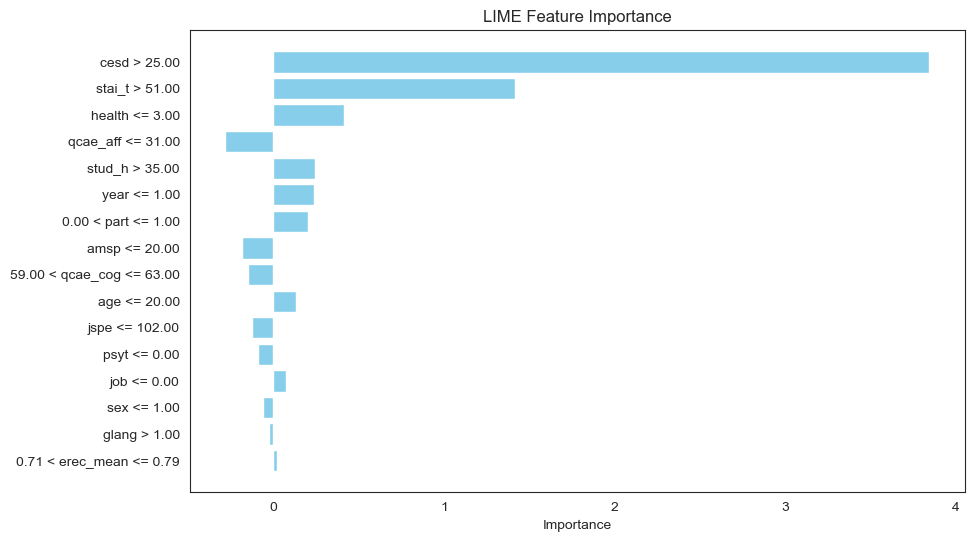

In [45]:
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = exp.as_list()

# Convert to DataFrame for easier plotting
importance_df = pd.DataFrame(feature_importance, columns=['Feature', 'Importance'])

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('LIME Feature Importance')
plt.gca().invert_yaxis()
plt.show()


## <span style="color:red">SHAP features importance</span>

SHAP values provide a powerful and consistent method for interpreting machine learning models. By calculating and visualizing the contributions of each feature to individual predictions and overall model performance, SHAP helps in understanding how features impact the model's outputs. This can be crucial for model interpretability, trustworthiness, and debugging.

**We can see that cesd and stai_t are the most important features like other previous methods**

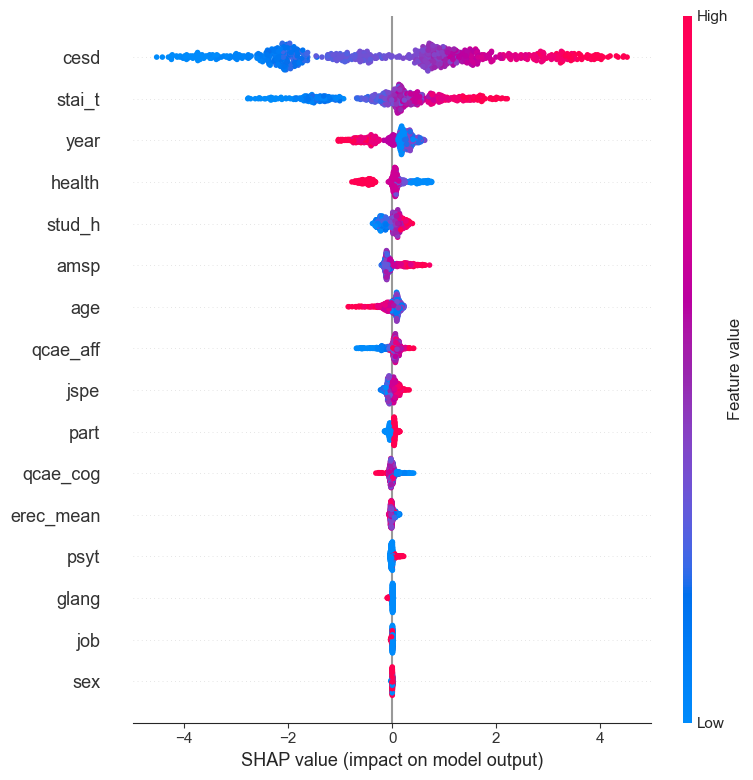

In [46]:
# Specific SHAP implementation for Tree models like Random Forest
import shap
shap_explainer = shap.TreeExplainer(best_rf)
shap_importance_train = shap_explainer.shap_values(X_train)
shap.summary_plot(shap_importance_train,X_train,feature_names=X.columns[:])

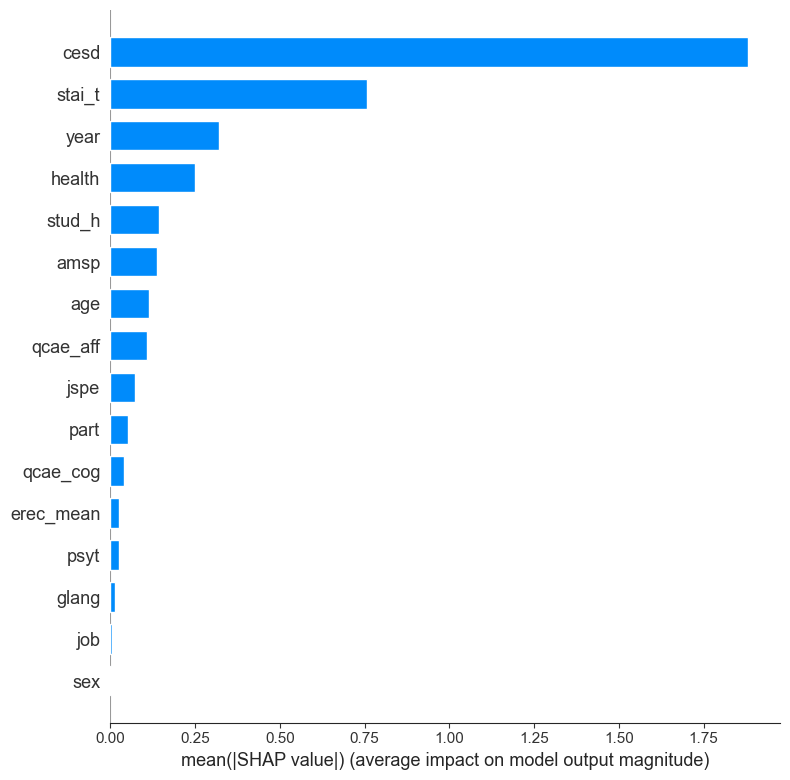

In [50]:
shap.summary_plot(shap_importance_train,X_train,feature_names=X.columns[:],plot_type="bar")